# **Introducción al Análisis Exploratorio de Datos (EDA) del Proyecto "China Garden"**

En un entorno competitivo y dinámico como el mercado de restaurantes en Estados Unidos, el análisis de datos se ha convertido en una herramienta esencial para entender la posición de una marca, anticipar tendencias y tomar decisiones estratégicas fundamentadas. En este proyecto, nuestro objetivo es realizar un análisis exploratorio de datos (EDA) para una reconocida cadena de restaurantes chinos, **China Garden**, con el fin de apoyar su estrategia de expansión en la costa este del país.

El EDA proporcionará una base sólida para identificar oportunidades de crecimiento y optimización operativa, analizando tanto datos de desempeño actual como información sobre la competencia. Este análisis también permitirá evaluar factores clave como la satisfacción del cliente, la presencia de mercado, y las ubicaciones óptimas para nuevos restaurantes. 

#### **Objetivos del Análisis Exploratorio de Datos**

Para lograr los objetivos generales del proyecto, nuestro EDA se centrará en los siguientes puntos:

1. **Revisión de Tipos de Datos y Descripción de Datasets:**
   - Examinar los tipos de datos por columna en cada dataset disponible para asegurar su adecuación al análisis posterior. Se incluirá una descripción detallada de cada dataset, abordando su propósito y relevancia en el contexto del proyecto.

2. **Justificación de la Eliminación de Columnas:**
   - Analizar y explicar la eliminación de columnas que no aportan valor al análisis o que presentan datos inconsistentes. Esta etapa es fundamental para mejorar la eficiencia del procesamiento de datos y mantener la integridad del análisis.

3. **Identificación y Manejo de Valores Nulos:**
   - Detectar los valores nulos en los datasets y proponer estrategias adecuadas de manejo, como la imputación de valores basados en la media, mediana o la eliminación de registros, dependiendo de la relevancia y el impacto de los datos faltantes.

4. **Detección y Tratamiento de Registros Duplicados:**
   - Identificar registros duplicados que puedan sesgar el análisis. Proponer métodos para su tratamiento, como la eliminación de duplicados exactos o el análisis de duplicados parciales para decidir la mejor acción.

5. **Análisis Gráfico y Visualización de Datos:**
   - Utilizar herramientas como **Matplotlib** y **Seaborn** para realizar análisis gráficos que permitan entender el comportamiento de los datos. Este enfoque incluirá, pero no se limitará a:
     - Visualización de la distribución de restaurantes y hoteles en la costa este.
     - Cálculo del porcentaje de mercado capturado por los restaurantes de comida china en comparación con otros tipos de restaurantes.
     - Identificación de los 10 principales restaurantes de comida china en términos de cantidad, promedio de calificaciones y presencia de mercado.
     - Análisis geográfico para entender la ubicación de los restaurantes de "China Garden" y su competencia directa.
     - Análisis de las zonas con mayor concentración de hoteles para identificar las áreas de mayor interés turístico.
     - Cualquier otro análisis pertinente que pueda ofrecer insights sobre el comportamiento del mercado y las oportunidades de expansión.

6. **Exportacion a Parquet**

Este EDA servirá como el cimiento sobre el cual se basarán todos los análisis futuros, ayudando a identificar patrones y tendencias que orientarán las decisiones estratégicas de "China Garden". A través de un enfoque minucioso y detallado, buscaremos proporcionar un conocimiento profundo y detallado del mercado, permitiendo a la marca mejorar su posicionamiento y maximizar su potencial de crecimiento en la costa este de Estados Unidos.

### **Empezemos**

## **1. Carga de datos Google maps**

**Descripción de los Datos de Google Maps**

Para este proyecto, se han recopilado datos provenientes de Google Maps, una de las plataformas más utilizadas por los consumidores para compartir opiniones sobre sus experiencias en restaurantes. Estos datos se encuentran organizados en dos carpetas principales, cada una con una estructura específica que facilita el análisis detallado de la información.

**1. Carpeta: Metadata Sitios**

La carpeta Metadata Sitios contiene información relevante sobre los establecimientos de interés, en este caso, los restaurantes de comida china en la costa este de Estados Unidos. Esta carpeta incluye un total de 11 archivos JSON que deberán ser unificados en un solo archivo consolidado para facilitar su análisis. Cada archivo JSON en esta carpeta proporciona datos específicos sobre las características de los restaurantes, como su nombre, ubicación geográfica, tipo de cocina, horarios de atención, y otros detalles relevantes que permiten identificar y comparar a cada establecimiento dentro del mercado.

**2. Carpeta: Review-Estados**

La carpeta Review-Estados contiene una colección organizada de reseñas de clientes, separadas por estado, en formato JSON. Dentro de esta carpeta, cada subcarpeta representa un estado de la costa este de Estados Unidos, y a su vez, cada subcarpeta contiene múltiples archivos JSON que recogen las opiniones y calificaciones de los usuarios sobre los restaurantes. Estos archivos de reseñas capturan datos cruciales como la fecha de la reseña, la calificación otorgada, los comentarios detallados de los clientes, y otros atributos relevantes como el número de "me gusta" que ha recibido cada reseña.

**BIBLIOTECAS UTILIZADAS**

In [5]:
import pandas as pd
import re
import glob
import os
import pyarrow as pa
import pyarrow.parquet as pq
import json
import matplotlib.pyplot as plt
import seaborn as sns


### **1.1 Metadata-Sitios**

Carga de archivos .json y concatenados en un mismo Dataframe

In [2]:
# Ruta del directorio que contiene los archivos JSON
ruta_directorio = './Datasets/Google/metadata-sitios/'

# Usa glob para encontrar todos los archivos .json en el directorio
archivos_json = glob.glob(os.path.join(ruta_directorio, '*.json'))

# Lista para almacenar los DataFrames de cada archivo
dfs = []

# Itera sobre cada archivo JSON encontrado
for archivo in archivos_json:
    # Carga el archivo JSON en un DataFrame
    df_temp = pd.read_json(archivo, lines=True)
    
    # Agrega el DataFrame a la lista
    dfs.append(df_temp)

# Combina todos los DataFrames en uno solo
df_final = pd.concat(dfs, ignore_index=True)

# Muestra el tamaño del DataFrame combinado
print(f"Tamaño del DataFrame Metadata-Sitios combinado: {df_final.shape}")

Tamaño del DataFrame Metadata-Sitios combinado: (3025011, 15)


### **Eliminar columnas**

 Se eliminaran las columnas por que sus tipos de datos no son necesarios en nuestri analisis de datos. 'description', 'MISC', 'state', 'relative_results', 'url'

In [3]:
# Eliminar las columnas especificadas del DataFrame
columnas_a_eliminar = ['description', 'MISC', 'state', 'relative_results', 'url']
df_final = df_final.drop(columns=columnas_a_eliminar)

In [4]:
# Verifica el resultado mostrando las primeras filas
df_final.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.35710,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun..."
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.21529,[Textile exporter],4.5,6,None,None
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],..."


De acuerdo a la direccion en la columna Address se crea la Columna estado, que nos da el estado del local comercial, se hace por que nuestro dataset contiene todos los comercios del pais, y el analisis sera solo sobre la costa Este del pais. 

In [5]:

# Usamos una expresión regular para extraer el estado (dos letras antes del código postal)
df_final['estado'] = df_final['address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}')

# Verifica que la nueva columna 'estado' se ha creado correctamente
df_final[['address', 'estado']].head()

,address,estado
0,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",GA
1,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",CA
2,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",CA
3,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",CA
4,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",CA


Se eliminan las filas de los comercios que no estan en la costa este del pais.

In [6]:
# Lista de los estados que quieres conservar de la costa este
estados_deseados = [
    'ME',  # Maine
    'NH',  # New Hampshire
    'MA',  # Massachusetts
    'RI',  # Rhode Island
    'CT',  # Connecticut
    'NY',  # New York
    'NJ',  # New Jersey
    'DE',  # Delaware
    'MD',  # Maryland
    'VA',  # Virginia
    'NC',  # North Carolina
    'SC',  # South Carolina
    'GA',  # Georgia
    'FL'   # Florida
]

In [7]:

# Filtrar el DataFrame para que solo queden las filas con los estados deseados
df_metadata_ce = df_final[df_final['estado'].isin(estados_deseados)]

# Verifica que el filtrado se haya realizado correctamente
print(df_metadata_ce[['address', 'estado']].head())
print(f"Tamaño del DataFrame después del filtrado: {df_metadata_ce.shape}")

                                              address estado
0   Porter Pharmacy, 129 N Second St, Cochran, GA ...     GA
14  NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...     FL
45  Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...     FL
56  Seminole Family Restaurant, 6864 Seminole Blvd...     FL
58  A-Top Insurance, 1009 Brighton Beach Ave, Broo...     NY
Tamaño del DataFrame después del filtrado: (946582, 11)


In [8]:
df_metadata_ce.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,estado
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",GA
14,NTK OUTDOOR,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",0x88d9beb4fe0532c1:0xef0555c169299d6,25.795204,-80.366038,[Corporate office],5.0,35,None,"[[Thursday, 9AM–6PM], [Friday, 9AM–6PM], [Satu...",FL
45,Cruises Inc. - Connie Stewart,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",0x88c2e49b79f06c31:0x4ed8c8ce27e926e0,27.832187,-82.704805,[Cruise agency],5.0,2,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",FL


Se agraga una nueva columna con el nombre completo del estado

In [9]:
# Diccionario de mapeo de abreviaturas a nombres completos de estados
mapa_estados = {
    'ME': 'Maine',
    'NH': 'New Hampshire',
    'MA': 'Massachusetts',
    'RI': 'Rhode Island',
    'CT': 'Connecticut',
    'NY': 'New York',
    'NJ': 'New Jersey',
    'DE': 'Delaware',
    'MD': 'Maryland',
    'VA': 'Virginia',
    'NC': 'North Carolina',
    'SC': 'South Carolina',
    'GA': 'Georgia',
    'FL': 'Florida'
}

# Crear la nueva columna 'nombre_estado' usando el mapeo
df_metadata_ce['nombre_estado'] = df_metadata_ce['estado'].map(mapa_estados)

# Verifica que la nueva columna se haya creado correctamente
print(df_metadata_ce[['estado', 'nombre_estado']].head())


   estado nombre_estado
0      GA       Georgia
14     FL       Florida
45     FL       Florida
56     FL       Florida
58     NY      New York


C:\Users\54370\AppData\Local\Temp\ipykernel_10024\2111716646.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata_ce['nombre_estado'] = df_metadata_ce['estado'].map(mapa_estados)


In [10]:
# Muestra el tamaño del DataFrame combinado
print(f"Tamaño del DataFrame combinado: {df_metadata_ce.shape}")

Tamaño del DataFrame combinado: (946582, 12)


Se exporta el dataframe a parquet para que su tamaño sea menor y su  velocidad de procesamiento sea mayor. 

In [11]:
# Guarda el DataFrame con la nueva columna en un archivo Parquet
df_metadata_ce.to_parquet('Datasets/Google/metadata-sitios/metadata-sitios-costaeste.parquet')


In [12]:
df_metadata_ce.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,estado,nombre_estado
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",GA,Georgia
14,NTK OUTDOOR,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",0x88d9beb4fe0532c1:0xef0555c169299d6,25.795204,-80.366038,[Corporate office],5.0,35,None,"[[Thursday, 9AM–6PM], [Friday, 9AM–6PM], [Satu...",FL,Florida
45,Cruises Inc. - Connie Stewart,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",0x88c2e49b79f06c31:0x4ed8c8ce27e926e0,27.832187,-82.704805,[Cruise agency],5.0,2,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",FL,Florida


Cargo el parquet por que la velocidad de procesamiento aumentara de manera significativa y hacer asi la limpieza de datos que seran utlizados

In [13]:
# Especifica la ruta de tu archivo Parquet
ruta_archivo = 'Datasets/Google/metadata-sitios/metadata-sitios-costaeste.parquet'

# Cargar el archivo Parquet en un DataFrame
df = pd.read_parquet(ruta_archivo)

# Mostrar las primeras filas del DataFrame
df.head(3)


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,estado,nombre_estado
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",GA,Georgia
14,NTK OUTDOOR,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",0x88d9beb4fe0532c1:0xef0555c169299d6,25.795204,-80.366038,[Corporate office],5.0,35,None,"[[Thursday, 9AM–6PM], [Friday, 9AM–6PM], [Satu...",FL,Florida
45,Cruises Inc. - Connie Stewart,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",0x88c2e49b79f06c31:0x4ed8c8ce27e926e0,27.832187,-82.704805,[Cruise agency],5.0,2,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",FL,Florida


In [14]:
df

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,estado,nombre_estado
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",GA,Georgia
14,NTK OUTDOOR,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",0x88d9beb4fe0532c1:0xef0555c169299d6,25.795204,-80.366038,[Corporate office],5.0,35,None,"[[Thursday, 9AM–6PM], [Friday, 9AM–6PM], [Satu...",FL,Florida
45,Cruises Inc. - Connie Stewart,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",0x88c2e49b79f06c31:0x4ed8c8ce27e926e0,27.832187,-82.704805,[Cruise agency],5.0,2,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",FL,Florida
56,Seminole Family Restaurant,"Seminole Family Restaurant, 6864 Seminole Blvd...",0x88c2fb8614e57ce9:0x40b51628875ad6e9,27.834885,-82.787419,None,3.6,8,$$,None,FL,Florida
58,A-Top Insurance,"A-Top Insurance, 1009 Brighton Beach Ave, Broo...",0x89c24469c758686b:0x641f5b84cb9bedfa,40.578254,-73.959127,"[Insurance broker, Insurance agency]",2.0,4,None,"[[Thursday, 10AM–6PM], [Friday, 10AM–6PM], [Sa...",NY,New York
...,...,...,...,...,...,...,...,...,...,...,...,...
3024967,SVS Vision Optical Centers,"SVS Vision Optical Centers, 1551 Niagara Falls...",0x89d3721399f576df:0xe572aaa0d5ae28fc,42.997026,-78.821580,"[Eye care center, Contact lenses supplier, Opt...",4.7,68,None,"[[Saturday, 9AM–1PM], [Sunday, Closed], [Monda...",NY,New York
3024968,Express Liquor,"Express Liquor, 6589 Thompson Rd suite b, Syra...",0x89d9f2a96ec09509:0xc8d86190079d033,43.088776,-76.092804,[Liquor store],3.5,8,None,"[[Saturday, 10AM–10PM], [Sunday, 12–6PM], [Mon...",NY,New York
3024969,Allstar Collision and Paint,"Allstar Collision and Paint, 6050 Sheridan Dr,...",0x89d3744be13dc5f5:0x22f97178c788cb06,42.978248,-78.707804,"[Auto body shop, Auto dent removal service, Ca...",5.0,48,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...",NY,New York
3024976,House of Gourmet -- 食全食美,"House of Gourmet -- 食全食美, 2865 Sheridan Dr Sui...",0x89d373386b718fff:0xf82c90ef48e7b23,42.980251,-78.827337,"[Chinese restaurant, Sichuan restaurant]",4.3,58,None,"[[Saturday, 11:15AM–9:45PM], [Sunday, 11:15AM–...",NY,New York


Se crea la columna ciudad de acuerdo a la columna addres para ser utlizada posteriormente en el analisis de datos

In [15]:

# Utilizamos una expresión regular para extraer la ciudad, que se encuentra entre la dirección y el estado
df['city'] = df['address'].str.extract(r',\s*([^,]+),\s*[A-Z]{2}\s*\d{5}')

# Mostrar las primeras filas para verificar
df[['address', 'city']].head()

,address,city
0,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",Cochran
14,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",Miami
45,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",Pinellas Park
56,"Seminole Family Restaurant, 6864 Seminole Blvd...",Seminole
58,"A-Top Insurance, 1009 Brighton Beach Ave, Broo...",Brooklyn


In [16]:
df

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,estado,nombre_estado,city
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",GA,Georgia,Cochran
14,NTK OUTDOOR,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",0x88d9beb4fe0532c1:0xef0555c169299d6,25.795204,-80.366038,[Corporate office],5.0,35,None,"[[Thursday, 9AM–6PM], [Friday, 9AM–6PM], [Satu...",FL,Florida,Miami
45,Cruises Inc. - Connie Stewart,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",0x88c2e49b79f06c31:0x4ed8c8ce27e926e0,27.832187,-82.704805,[Cruise agency],5.0,2,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",FL,Florida,Pinellas Park
56,Seminole Family Restaurant,"Seminole Family Restaurant, 6864 Seminole Blvd...",0x88c2fb8614e57ce9:0x40b51628875ad6e9,27.834885,-82.787419,None,3.6,8,$$,None,FL,Florida,Seminole
58,A-Top Insurance,"A-Top Insurance, 1009 Brighton Beach Ave, Broo...",0x89c24469c758686b:0x641f5b84cb9bedfa,40.578254,-73.959127,"[Insurance broker, Insurance agency]",2.0,4,None,"[[Thursday, 10AM–6PM], [Friday, 10AM–6PM], [Sa...",NY,New York,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024967,SVS Vision Optical Centers,"SVS Vision Optical Centers, 1551 Niagara Falls...",0x89d3721399f576df:0xe572aaa0d5ae28fc,42.997026,-78.821580,"[Eye care center, Contact lenses supplier, Opt...",4.7,68,None,"[[Saturday, 9AM–1PM], [Sunday, Closed], [Monda...",NY,New York,Buffalo
3024968,Express Liquor,"Express Liquor, 6589 Thompson Rd suite b, Syra...",0x89d9f2a96ec09509:0xc8d86190079d033,43.088776,-76.092804,[Liquor store],3.5,8,None,"[[Saturday, 10AM–10PM], [Sunday, 12–6PM], [Mon...",NY,New York,Syracuse
3024969,Allstar Collision and Paint,"Allstar Collision and Paint, 6050 Sheridan Dr,...",0x89d3744be13dc5f5:0x22f97178c788cb06,42.978248,-78.707804,"[Auto body shop, Auto dent removal service, Ca...",5.0,48,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...",NY,New York,Buffalo
3024976,House of Gourmet -- 食全食美,"House of Gourmet -- 食全食美, 2865 Sheridan Dr Sui...",0x89d373386b718fff:0xf82c90ef48e7b23,42.980251,-78.827337,"[Chinese restaurant, Sichuan restaurant]",4.3,58,None,"[[Saturday, 11:15AM–9:45PM], [Sunday, 11:15AM–...",NY,New York,Tonawanda


In [17]:
# Guarda el DataFrame con la nueva columna en un archivo Parquet
df.to_parquet('Datasets/Google/metadata-sitios/metadata-sitios-costaeste-estado-ciudad.parquet')

# **Creacion de los archivos parquet de Reviews-Estados de Google maps**

In [18]:
# Función para procesar la carga de datos
def procesar_archivos_json(ruta_directorio, nombre_estado, columnas_a_eliminar=['pics', 'resp']):
    # Usa glob para encontrar todos los archivos .json en el directorio
    archivos_json = glob.glob(os.path.join(ruta_directorio, '*.json'))
    
    # Lista para almacenar los DataFrames de cada archivo
    dfs = []

    # Itera sobre cada archivo JSON encontrado
    for archivo in archivos_json:
        # Carga el archivo JSON en un DataFrame
        df_temp = pd.read_json(archivo, lines=True)
        
        # Agrega el DataFrame a la lista
        dfs.append(df_temp)

    # Combina todos los DataFrames en uno solo
    df_combinado = pd.concat(dfs, ignore_index=True)

    # Muestra el tamaño del DataFrame combinado
    print(f"Tamaño del DataFrame combinado para {nombre_estado}: {df_combinado.shape}")

    # Eliminar las columnas especificadas del DataFrame
    df_combinado = df_combinado.drop(columns=columnas_a_eliminar)

    # Guarda el DataFrame en un archivo Parquet
    ruta_salida = f'Datasets/Google/review-estados/review-estados-parquet/review-{nombre_estado.lower()}.parquet'
    df_combinado.to_parquet(ruta_salida)
    
    print(f"Archivo Parquet guardado en: {ruta_salida}")
    
    return df_combinado

### **01. Estado de la Florida**

In [19]:
df_florida = procesar_archivos_json('./Datasets/Google/review-estados/review-Florida', 'Florida')


Tamaño del DataFrame combinado para Florida: (2850000, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-florida.parquet


### **02. Estado de Georgia**

In [20]:
df_georgia = procesar_archivos_json('./Datasets/Google/review-estados/review-Georgia', 'Georgia')

Tamaño del DataFrame combinado para Georgia: (1950000, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-georgia.parquet


### **03. Estado de North Carolina**

In [21]:
df_north_carolina = procesar_archivos_json('./Datasets/Google/review-estados/review-North_Carolina', 'North_Carolina')

Tamaño del DataFrame combinado para North_Carolina: (2250000, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-north_carolina.parquet


### **04. Estado de South Carolina**

In [22]:
df_south_carolina = procesar_archivos_json('./Datasets/Google/review-estados/review-South_Carolina', 'South_Carolina')

Tamaño del DataFrame combinado para South_Carolina: (2100000, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-south_carolina.parquet


### **05. Estado de Maine**

In [23]:
df_maine = procesar_archivos_json('./Datasets/Google/review-estados/review-Maine', 'Maine')

Tamaño del DataFrame combinado para Maine: (1123881, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-maine.parquet


### **06. Estado de Massachusetts**

In [24]:
df_maine = procesar_archivos_json('./Datasets/Google/review-estados/review-Massachusetts', 'Massachusetts')

Tamaño del DataFrame combinado para Massachusetts: (2400000, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-massachusetts.parquet


### **07. Estado de New Hampshire**

In [25]:
df_new_hampshire = procesar_archivos_json('./Datasets/Google/review-estados/review-New_Hampshire', 'New_Hampshire')

Tamaño del DataFrame combinado para New_Hampshire: (1296603, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-new_hampshire.parquet


### **08.Estado de Rhode Island**

In [26]:
df_rhode_island = procesar_archivos_json('./Datasets/Google/review-estados/review-Rhode_Island', 'Rhode_Island')

Tamaño del DataFrame combinado para Rhode_Island: (890006, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-rhode_island.parquet


### **09. Estado de New York**

In [27]:
df_new_york = procesar_archivos_json('./Datasets/Google/review-estados/review-New_York', 'New_York')

Tamaño del DataFrame combinado para New_York: (2700000, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-new_york.parquet


### **10. Estado de Connecticut**

In [28]:
df_connecticut = procesar_archivos_json('./Datasets/Google/review-estados/review-Connecticut', 'Connecticut')

Tamaño del DataFrame combinado para Connecticut: (2680107, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-connecticut.parquet


### **11. Estado de Delaware**


In [29]:
df_delaware = procesar_archivos_json('./Datasets/Google/review-estados/review-Delaware', 'Delaware')

Tamaño del DataFrame combinado para Delaware: (905537, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-delaware.parquet


### **12. Estado de New Jersey**

In [30]:
df_new_jersey = procesar_archivos_json('./Datasets/Google/review-estados/review-New_Jersey', 'New_Jersey')

Tamaño del DataFrame combinado para New_Jersey: (1950000, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-new_jersey.parquet


### **13. Estado de Maryland**

In [31]:
df_maryland = procesar_archivos_json('./Datasets/Google/review-estados/review-Maryland', 'Maryland')

Tamaño del DataFrame combinado para Maryland: (2400000, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-maryland.parquet


### **14. Estado de Virginia**

In [32]:
df_virginia = procesar_archivos_json('./Datasets/Google/review-estados/review-Virginia', 'Virginia')

Tamaño del DataFrame combinado para Virginia: (1662059, 8)
Archivo Parquet guardado en: Datasets/Google/review-estados/review-estados-parquet/review-virginia.parquet


## **2. Carga de datos Yelp**

**Descripción de los Datos de Yelp**
Para el análisis de la cadena de restaurantes China Garden en la costa este de Estados Unidos, se han recopilado datos detallados de Yelp, una de las plataformas de reseñas de restaurantes más importantes. Estos datos se encuentran distribuidos en cinco archivos distintos, cada uno de los cuales proporciona información relevante para entender el comportamiento del mercado y la percepción de los consumidores.

**1. Archivo: business.pkl**

El archivo business.pkl contiene información esencial sobre los negocios listados en Yelp, específicamente sobre los restaurantes de interés. Este archivo proporciona datos detallados de cada establecimiento, incluyendo su nombre, dirección, categoría, atributos adicionales (como si ofrece opciones vegetarianas o si tiene estacionamiento), y su ubicación geográfica exacta. Estos datos son fundamentales para realizar un análisis geoespacial, identificar patrones en las ubicaciones de los restaurantes, y comparar características de los competidores dentro del mismo mercado.

**2. Archivo: Checkin.json**

El archivo Checkin.json proporciona los datos de horarios de reservas y registros de visitas de los usuarios a los restaurantes. Este archivo permite analizar las horas pico de actividad, la popularidad de los restaurantes en diferentes días de la semana, y la frecuencia de visitas de los clientes. Este análisis es crucial para entender los patrones de tráfico y comportamiento de los consumidores, lo que puede ayudar a optimizar los horarios de operación y estrategias de marketing.

**3. Archivo: Review.json**

El archivo Review.json contiene las reseñas de los clientes que han visitado los restaurantes de interés. Cada reseña incluye información valiosa como la calificación otorgada (de 1 a 5 estrellas), el texto de la reseña, la fecha en que se escribió, y otros atributos que reflejan la experiencia del cliente. Este archivo es fundamental para realizar un análisis de sentimientos y evaluar las opiniones de los consumidores sobre China Garden y sus competidores. Además, permite identificar temas recurrentes en los comentarios de los clientes, puntos fuertes, áreas de mejora, y tendencias emergentes en la percepción del mercado.

**4. Archivo: Tip**

El archivo Tip contiene una recopilación de recomendaciones o consejos breves que los usuarios han dejado sobre los restaurantes en Yelp. Aunque estos "tips" son más cortos que las reseñas tradicionales, a menudo proporcionan insights rápidos y directos sobre lo que los clientes consideran relevante o digno de destacar. Este archivo permite complementar el análisis de reseñas con datos adicionales que pueden ayudar a identificar las expectativas y preferencias de los clientes.

**5. Archivo: User**

El archivo User proporciona información sobre los usuarios de Yelp que han interactuado con los restaurantes de la cadena y sus competidores. Incluye detalles como el número total de reseñas realizadas por cada usuario, su ubicación, el promedio de calificaciones otorgadas, y otros comportamientos del usuario en la plataforma. Este archivo es clave para identificar clientes leales, entender los perfiles demográficos y de comportamiento de los clientes, y determinar cómo interactúan diferentes grupos de consumidores con los restaurantes de interés.

**Proceso de Preparación de los Dato**s
Para realizar un análisis integral, se procederá con la limpieza y unificación de los datos de cada archivo:

Integración de la información de negocios del archivo business.pkl con los datos de los archivos de reseñas, tips, check-ins y usuarios.
Procesamiento de los archivos JSON para extraer insights relevantes sobre la actividad de los clientes, patrones de reserva, y calificaciones.
Análisis combinado de los datos de Yelp para identificar oportunidades de mejora y estrategias de crecimiento para "China Garden" en la costa este de Estados Unidos.
Esta estructura de datos permitirá llevar a cabo un análisis exhaustivo que considere no solo la competencia y el posicionamiento actual de "China Garden", sino también las expectativas y percepciones de los clientes en tiempo real.

### **01. Carga y exportacion a parquet del archivo Bussiness.pkl**

In [33]:
# Ruta al archivo .pkl
ruta_archivo = 'Datasets/Yelp/business.pkl'

# Cargar el archivo .pkl en un DataFrame
df = pd.read_pickle(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Exploración de columnas
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [35]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Se encontraron varias columnas duplicadas

In [36]:
# Eliminar columnas duplicadas
df = df.loc[:, ~df.columns.duplicated()]

# Mostrar las columnas después de eliminar duplicados
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [37]:
df.shape

(150346, 14)

In [38]:
# Eliminar las columnas especificadas del DataFrame
columnas_a_eliminar = ['address', 'is_open', 'attributes', 'hours']
df = df.drop(columns=columnas_a_eliminar)

df.shape

(150346, 10)

Filtrar df por estados de la costa este

In [39]:
# Lista de estados de la costa este que quieres mantener
east_coast_states = ['ME', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'DE', 'MD', 'VA', 'NC', 'SC', 'GA', 'FL']

# Filtrar el DataFrame para eliminar los valores nulos en la columna 'state' 
# y mantener solo los estados de la costa este
df_filtrado = df[df['state'].isin(east_coast_states) & df['state'].notna()]

# Mostrar el DataFrame filtrado
df_filtrado.head(3)


,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,categories
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,Land O' Lakes,FL,34639,28.190459,-82.45738,3.5,6,"Department Stores, Shopping, Fashion"
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,"General Dentistry, Dentists, Health & Medical,..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,Largo,FL,33771,27.916116,-82.760461,4.5,100,"Food, Delis, Italian, Bakeries, Restaurants"


In [40]:
df_filtrado.shape

(37133, 10)

Agregar columna con el nombre de estado completo

In [41]:
# Diccionario de códigos de estado a nombres completos
state_names = {
    'ME': 'Maine',
    'NH': 'New Hampshire',
    'MA': 'Massachusetts',
    'RI': 'Rhode Island',
    'CT': 'Connecticut',
    'NY': 'New York',
    'NJ': 'New Jersey',
    'DE': 'Delaware',
    'MD': 'Maryland',
    'VA': 'Virginia',
    'NC': 'North Carolina',
    'SC': 'South Carolina',
    'GA': 'Georgia',
    'FL': 'Florida'
}

# Crear la nueva columna 'nombre_estado' utilizando el diccionario y el método .map()
df_filtrado['nombre_estado'] = df_filtrado['state'].map(state_names)

# Mostrar el DataFrame con la nueva columna
df_filtrado.head(3)


C:\Users\54370\AppData\Local\Temp\ipykernel_10024\2195659317.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nombre_estado'] = df_filtrado['state'].map(state_names)


,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,categories,nombre_estado
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,Land O' Lakes,FL,34639,28.190459,-82.45738,3.5,6,"Department Stores, Shopping, Fashion",Florida
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,"General Dentistry, Dentists, Health & Medical,...",Florida
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,Largo,FL,33771,27.916116,-82.760461,4.5,100,"Food, Delis, Italian, Bakeries, Restaurants",Florida


In [42]:
# Guarda el DataFrame en un archivo Parquet
df_filtrado.to_parquet('Datasets/Yelp/parquet_files/Business.parquet')

### **02. Carga y exportacion a parquet del archivo Checkin.json**

In [43]:
#Ruta de tu archivo JSON 1
ruta_archivo = 'Datasets\Yelp\checkin.json'

# Carga el archivo JSON en un DataFrame de pandas usando lines=True
df = pd.read_json(ruta_archivo, lines=True)

# Muestra el DataFrame
df.head(3)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"


In [44]:
# Guarda el DataFrame en un archivo Parquet
df.to_parquet('Datasets/Yelp/parquet_files/Checkin.parquet')

### **03. Carga y exportacion a parquet del archivo review.json**

In [45]:
# Cargar review.json
# Intenta con utf-8
try:
    with open('Datasets/Yelp/review.json', 'r', encoding='utf-8') as f:
        df_review = pd.DataFrame([json.loads(line) for line in f])
except UnicodeDecodeError:
    # Si utf-8 falla, intenta con utf-8-sig
    with open('Datasets/Yelp/review.json', 'r', encoding='utf-8-sig') as f:
        df_review = pd.DataFrame([json.loads(line) for line in f])

In [46]:
df_review.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30


In [47]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [48]:
# Eliminar columnas innecesarias
df_review.drop(['useful', 'funny', 'cool'], axis=1, inplace=True)

In [49]:
# Exportar a parquet
df_review.to_parquet('Datasets/Yelp/parquet_files/review-yelp.parquet', index=False)

ArrowMemoryError: realloc of size 704643072 failed

### **Abrir nuevamente business.parquet para mergear los 14 estados en el dataframe review**

In [27]:
business = pd.read_parquet("Datasets/Yelp/parquet_files/Business.parquet")
review = pd.read_parquet('Datasets/Yelp/parquet_files/review-yelp.parquet')

In [28]:
merged_df = pd.merge(business, review, on='business_id', how='inner')

In [29]:
merged_df.shape

(1734757, 16)

In [30]:
merged_df.head(3)

,business_id,name,city,state,postal_code,latitude,longitude,stars_x,review_count,categories,nombre_estado,review_id,user_id,stars_y,text,date
0,UJsufbvfyfONHeWdvAHKjA,Marshalls,Land O' Lakes,FL,34639,28.190459,-82.45738,3.5,6,"Department Stores, Shopping, Fashion",Florida,MKf1btP1IWejTptigCLrSw,u4Dzi_282Zw6hKqZJOhsSw,5.0,What's not to love about Marshalls?! I absolut...,2020-11-20 19:02:54
1,UJsufbvfyfONHeWdvAHKjA,Marshalls,Land O' Lakes,FL,34639,28.190459,-82.45738,3.5,6,"Department Stores, Shopping, Fashion",Florida,MxpvjOXWjyp3xPA6qJenKw,qjfMBIZpQT9DDtw_BWCopQ,4.0,"This is a nice Marshalls, and it is pretty new...",2015-07-24 00:31:29
2,UJsufbvfyfONHeWdvAHKjA,Marshalls,Land O' Lakes,FL,34639,28.190459,-82.45738,3.5,6,"Department Stores, Shopping, Fashion",Florida,6dy2iBob-3lNlGVfdzXH_Q,F-OwSluUWMn0vMp3bPWMnQ,3.0,I Have not been here in so many years that I f...,2019-10-18 17:43:01


### **Exportar a parquet reviews-yelp**

In [32]:
merged_df.to_parquet("Datasets/Yelp/parquet_files/review-yelp.parquet")

## Limpieza metadata_google

In [7]:
df_metadata_google = pd.read_parquet('Datasets/Google/metadata-sitios/metadata-sitios-costaeste-estado-ciudad.parquet')
df_metadata_google.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,estado,nombre_estado,city
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",GA,Georgia,Cochran
14,NTK OUTDOOR,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",0x88d9beb4fe0532c1:0xef0555c169299d6,25.795204,-80.366038,[Corporate office],5.0,35,None,"[[Thursday, 9AM–6PM], [Friday, 9AM–6PM], [Satu...",FL,Florida,Miami
45,Cruises Inc. - Connie Stewart,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",0x88c2e49b79f06c31:0x4ed8c8ce27e926e0,27.832187,-82.704805,[Cruise agency],5.0,2,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",FL,Florida,Pinellas Park


In [6]:
# Chequeo de duplicados en gmap_id
df_metadata_google.duplicated('gmap_id').sum()

np.int64(8345)

In [7]:
duplicados = df_metadata_google[df_metadata_google.duplicated(subset='gmap_id', keep=False)]
conteo = df_metadata_google['gmap_id'].value_counts()
repetidos = conteo[conteo > 1]

print(repetidos)


gmap_id
0x88f16e41928ff687:0x883dad4fd048e8f8    12
0x884d0db9065bd815:0xae8443b860eebe8e     2
0x89e841975461fb8f:0x16df15574a663326     2
0x88f5993c9c7382fd:0xfd57cf3b5826d3b9     2
0x88d9beb4fe0532c1:0xef0555c169299d6      2
                                         ..
0x88d9a4e66e40edf1:0xebbab577da8076fe     2
0x88d9aa92d831c45b:0x9b14ae9ded185345     2
0x88d9a67325994b17:0xdac6d8d4600fc268     2
0x88d9b937c540e7d7:0xc36f9d9593ca9008     2
0x4cb29c6a0460a84b:0x243771cbbefd58d9     2
Name: count, Length: 8335, dtype: int64


In [8]:
# Eliminar duplicados del DF columna gmap_id
df_metadata_google = df_metadata_google.drop_duplicates(subset=['gmap_id'])

In [9]:
# Chequeo de duplicados en gmap_id
df_metadata_google.duplicated('gmap_id').sum()

np.int64(0)

In [10]:
# Chequeo de datos nulos en el DF
df_metadata_google.isnull().sum()

name                   0
address                0
gmap_id                0
latitude               0
longitude              0
category            5212
avg_rating             0
num_of_reviews         0
price             846698
hours             233791
estado                 0
nombre_estado          0
city                 668
dtype: int64

Borrar columna price y hours

In [11]:
# Eliminar las columnas especificadas del DataFrame
columnas_a_eliminar = ['price', 'hours']
df_metadata_google = df_metadata_google.drop(columns=columnas_a_eliminar)

Eliminar filas con categorias nulas

In [12]:
df_metadata_google= df_metadata_google.dropna(subset=['category'])

Columna city contiene 667 nulos... ubicar por latitud y longitud ???

In [6]:
# Exportar metadata-sitios limpio a parquet
df_metadata_google.to_parquet("Datasets/Google/metadata-sitios/metadata-limpio.parquet")

NameError: name 'df_metadata_google' is not defined

In [33]:
df_metadata_google.shape

(933025, 11)

### Unificar **review-estados** en un solo Dataframe

In [8]:
# Directorio donde se encuentran tus archivos .parquet
directorio = "Datasets/Google/review-estados/review-estados-parquet"

# Lista todos los archivos .parquet en el directorio
archivos_parquet = glob.glob(os.path.join(directorio, "*.parquet"))

# Lee y concatena los archivos
df_review_estados = pd.concat([pd.read_parquet(archivo) for archivo in archivos_parquet], ignore_index=True)

In [9]:
df_review_estados.head(3)

,user_id,name,time,rating,text,gmap_id
0,1.140765e+20,Jeff Mccomish,1612059976820,5,Great friendly independent packie,0x89e64b04d274c9d9:0x84d833dcc10ae21d
1,1.015203e+20,Outlaw PiRu,1544752859553,5,Great Atmosphere and Great Service. Fantastic ...,0x89e64b04d274c9d9:0x84d833dcc10ae21d
2,1.118002e+20,Hector Acevedo,1564367962353,5,Nice neighborhood store with great sandwiches ...,0x89e64b04d274c9d9:0x84d833dcc10ae21d


In [10]:
df_review_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27158193 entries, 0 to 27158192
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   gmap_id  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.2+ GB


In [ ]:
df_review_estados.duplicated().sum()


np.int64(491681)

### **Eliminar categorias no necesarias** excepto hoteles y restaurantes

In [12]:
df_restaurant_and_hotels = pd.read_parquet('Datasets\Google\metadata-sitios\metadata-limpio.parquet')

In [13]:
df_restaurant_and_hotels.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,[Pharmacy],4.9,16,GA,Georgia,Cochran
14,NTK OUTDOOR,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",0x88d9beb4fe0532c1:0xef0555c169299d6,25.795204,-80.366038,[Corporate office],5.0,35,FL,Florida,Miami
45,Cruises Inc. - Connie Stewart,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",0x88c2e49b79f06c31:0x4ed8c8ce27e926e0,27.832187,-82.704805,[Cruise agency],5.0,2,FL,Florida,Pinellas Park


In [15]:
df_restaurants = df_restaurant_and_hotels[df_restaurant_and_hotels['category'].apply(lambda x: any('restaurant' in item.lower() for item in x))]

df_restaurants

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
114,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,[Restaurant],5.0,1,FL,Florida,Cape Coral
115,Fresh Point Country Buffet,"Fresh Point Country Buffet, 10525 US-19, Pinel...",0x88c2e4e34f1ed783:0x76c5da381c499d79,27.867489,-82.702971,[Buffet restaurant],5.0,2,FL,Florida,Pinellas Park
183,Benny's Famous Fried Clams,"Benny's Famous Fried Clams, 199 W Commercial S...",0x4cb29c1dea53f29f:0xc606af14a0995094,43.643365,-70.272457,[Restaurant],2.8,17,ME,Maine,Portland
219,The Aynor Inn,"The Aynor Inn, 343 8th Ave, Aynor, SC 29511",0x890007d78c3e5ab9:0x4f105096aaef191d,33.996785,-79.202560,"[Buffet restaurant, Family restaurant, Seafood...",4.3,2,SC,South Carolina,Aynor
250,Paula's Kitchen,"Paula's Kitchen, 777 Elmwood Ave, Providence, ...",0x89e44fe1c2a2a2c3:0x5fc9f6751fb29737,41.790994,-71.422631,[Dominican restaurant],4.7,18,RI,Rhode Island,Providence
...,...,...,...,...,...,...,...,...,...,...,...
3024795,Jeremy's Honduras Restaurant & Billiards,"Jeremy's Honduras Restaurant & Billiards, 581 ...",0x89c3c6ecb92e945d:0x47c8160d587d3265,40.486796,-74.468884,"[Honduran restaurant, Delivery Restaurant]",3.8,118,NJ,New Jersey,Somerset
3024835,Liberty Pizza & Sub,"Liberty Pizza & Sub, 8136 Liberty Road Unit #G...",0x89c81997ab131515:0xee746ac21887fe01,39.355377,-76.761759,[Restaurant],3.0,108,MD,Maryland,Windsor Mill
3024846,Melt,"Melt, 6325 Windsor Mill Rd # 1, Baltimore, MD ...",0x89c81bdd8ae87749:0xd0c17064d8560660,39.321513,-76.726280,[Pizza restaurant],4.2,108,MD,Maryland,Baltimore
3024907,China King Express,"China King Express, 6938 Erie Rd, Derby, NY 14047",0x89d31f176b64da79:0x202faca0f650e880,42.698185,-78.988253,[Chinese restaurant],4.1,118,NY,New York,Derby


### EDA Análisis Exploratorio de Datos - Google

**Filtrar dataframe por categorías de Restaurantes y Hoteles**

In [16]:
import ast 
#Paso 1: Convertir cadenas a listas (si los datos son cadenas que parecen listas)
df_restaurant_and_hotels['category'] = df_restaurant_and_hotels['category'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

#Paso 2: Explode la columna 'category' para separar las listas en filas individuales
df_exploded = df_restaurant_and_hotels.explode('category')

#Paso 3: Filtrar las filas por palabras clave
keywords = r'(?:\s|^)(Restaurant|Restaurants|Hotel|Hotels|Tourism)(?:\s|$)'
df_filtered = df_exploded[df_exploded['category'].str.contains(keywords, case=False, na=False, regex=True)]

#Mostrar el DataFrame filtrado
df_filtered

C:\Users\54370\AppData\Local\Temp\ipykernel_29600\3016914403.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df_exploded[df_exploded['category'].str.contains(keywords, case=False, na=False, regex=True)]


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
114,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,Restaurant,5.0,1,FL,Florida,Cape Coral
115,Fresh Point Country Buffet,"Fresh Point Country Buffet, 10525 US-19, Pinel...",0x88c2e4e34f1ed783:0x76c5da381c499d79,27.867489,-82.702971,Buffet restaurant,5.0,2,FL,Florida,Pinellas Park
183,Benny's Famous Fried Clams,"Benny's Famous Fried Clams, 199 W Commercial S...",0x4cb29c1dea53f29f:0xc606af14a0995094,43.643365,-70.272457,Restaurant,2.8,17,ME,Maine,Portland
219,The Aynor Inn,"The Aynor Inn, 343 8th Ave, Aynor, SC 29511",0x890007d78c3e5ab9:0x4f105096aaef191d,33.996785,-79.202560,Buffet restaurant,4.3,2,SC,South Carolina,Aynor
219,The Aynor Inn,"The Aynor Inn, 343 8th Ave, Aynor, SC 29511",0x890007d78c3e5ab9:0x4f105096aaef191d,33.996785,-79.202560,Family restaurant,4.3,2,SC,South Carolina,Aynor
...,...,...,...,...,...,...,...,...,...,...,...
3024835,Liberty Pizza & Sub,"Liberty Pizza & Sub, 8136 Liberty Road Unit #G...",0x89c81997ab131515:0xee746ac21887fe01,39.355377,-76.761759,Restaurant,3.0,108,MD,Maryland,Windsor Mill
3024846,Melt,"Melt, 6325 Windsor Mill Rd # 1, Baltimore, MD ...",0x89c81bdd8ae87749:0xd0c17064d8560660,39.321513,-76.726280,Pizza restaurant,4.2,108,MD,Maryland,Baltimore
3024907,China King Express,"China King Express, 6938 Erie Rd, Derby, NY 14047",0x89d31f176b64da79:0x202faca0f650e880,42.698185,-78.988253,Chinese restaurant,4.1,118,NY,New York,Derby
3024976,House of Gourmet -- 食全食美,"House of Gourmet -- 食全食美, 2865 Sheridan Dr Sui...",0x89d373386b718fff:0xf82c90ef48e7b23,42.980251,-78.827337,Chinese restaurant,4.3,58,NY,New York,Tonawanda


**Filtrado por Restaurantes chinos**

In [17]:
import ast 

# Filtrar las filas por palabras clave
keywords = r'(?:\s|^)(Chinese restaurant|Delivery Chinese restaurant|Chinese noodle restaurant)(?:\s|$)'
df_cr = df_filtered[df_filtered['category'].str.contains(keywords, case=False, na=False, regex=True)]

#Mostrar el DataFrame filtrado
df_cr

C:\Users\54370\AppData\Local\Temp\ipykernel_29600\4193842251.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_cr = df_filtered[df_filtered['category'].str.contains(keywords, case=False, na=False, regex=True)]


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
2880,China House Chinese & American Food,"China House Chinese & American Food, 827 Broad...",0x89c6c8e87f60800d:0xbacca2e5a90bdfcb,39.935655,-75.119530,Chinese restaurant,5.0,4,NJ,New Jersey,Camden
8172,WUJI,"WUJI, 68 E Putnam Ave, Greenwich, CT 06830",0x89c29846a70925f3:0xd15fd18f2efe0a63,41.032745,-73.624310,Chinese restaurant,3.8,18,CT,Connecticut,Greenwich
8820,Panda Express,"Panda Express, 13059 Lee Jackson Memorial Hwy,...",0x89b645175b2f5bf1:0x4000b96ee41f94d9,38.880261,-77.398403,Chinese restaurant,3.8,48,VA,Virginia,Fairfax
9238,Good Taste Asian Cuisine,"Good Taste Asian Cuisine, 42 Central St, Ipswi...",0x89e318c6e45de21f:0xb3073257db94786c,42.680840,-70.839105,Chinese restaurant,4.1,68,MA,Massachusetts,Ipswich
9428,Wok 'n Roll,"Wok 'n Roll, 1101 Bunn Hill Rd, Vestal, NY 13850",0x89daeebc3aa5c9f9:0x351fcdc697f3dded,42.094293,-75.975989,Chinese restaurant,4.0,18,NY,New York,Vestal
...,...,...,...,...,...,...,...,...,...,...,...
3024124,China One,"China One, 2003, 4019 Cedar Ln, Portsmouth, VA...",0x89ba9f3a2c094059:0xc56405cc884fd2ef,36.877227,-76.377279,Delivery Chinese restaurant,4.3,48,VA,Virginia,Portsmouth
3024281,Lucky Chinese Kitchen,"Lucky Chinese Kitchen, 970 18th Ave, Newark, N...",0x89c3acb040ae9dd9:0x9ed1ab06d415b98c,40.739035,-74.227925,Chinese restaurant,3.5,28,NJ,New Jersey,Newark
3024636,Fu Zhou Wei Zhong Wei Jia Xiang Feng Wei,"Fu Zhou Wei Zhong Wei Jia Xiang Feng Wei, 88 E...",0x89c25a289b0b70ab:0xad50a4eff25976fc,40.713835,-73.994140,Chinese restaurant,4.6,8,NY,New York,New York
3024907,China King Express,"China King Express, 6938 Erie Rd, Derby, NY 14047",0x89d31f176b64da79:0x202faca0f650e880,42.698185,-78.988253,Chinese restaurant,4.1,118,NY,New York,Derby


### **Top 10 Ciudades con más hoteles** 

In [18]:
# Filtrado por hoteles
# Asegurarse de que 'category' es una lista o un string
df_filtered['category'] = df_filtered['category'].apply(lambda x: x if isinstance(x, list) else [x] if isinstance(x, str) else [])

# Filtrar los hoteles
hotels_df = df_filtered[df_filtered['category'].apply(lambda x: any('Hotel' in item for item in x))]

hotels_df.head(3)

C:\Users\54370\AppData\Local\Temp\ipykernel_29600\2483548607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category'] = df_filtered['category'].apply(lambda x: x if isinstance(x, list) else [x] if isinstance(x, str) else [])


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
5346,"Garden City, SC","Garden City, SC, Murrells Inlet, SC 29576",0x890040a328107fdd:0xeae6f2337638588d,33.592541,-79.009323,[Hotel],3.0,2,SC,South Carolina,Murrells Inlet
7903,Kasa Charlotte FreeMoreWest,"Kasa Charlotte FreeMoreWest, 2020 Morton St, C...",0x8856a1dedb2e9e7d:0xc18c20b72da2e705,35.224397,-80.871880,[Hotel],5.0,8,NC,North Carolina,Charlotte
7945,Riverside Motel,"Riverside Motel, Yulee, FL 32097",0x88e50593793be5eb:0x8b1c18684402c3e2,30.735819,-81.687483,[Hotel],4.0,5,FL,Florida,Yulee


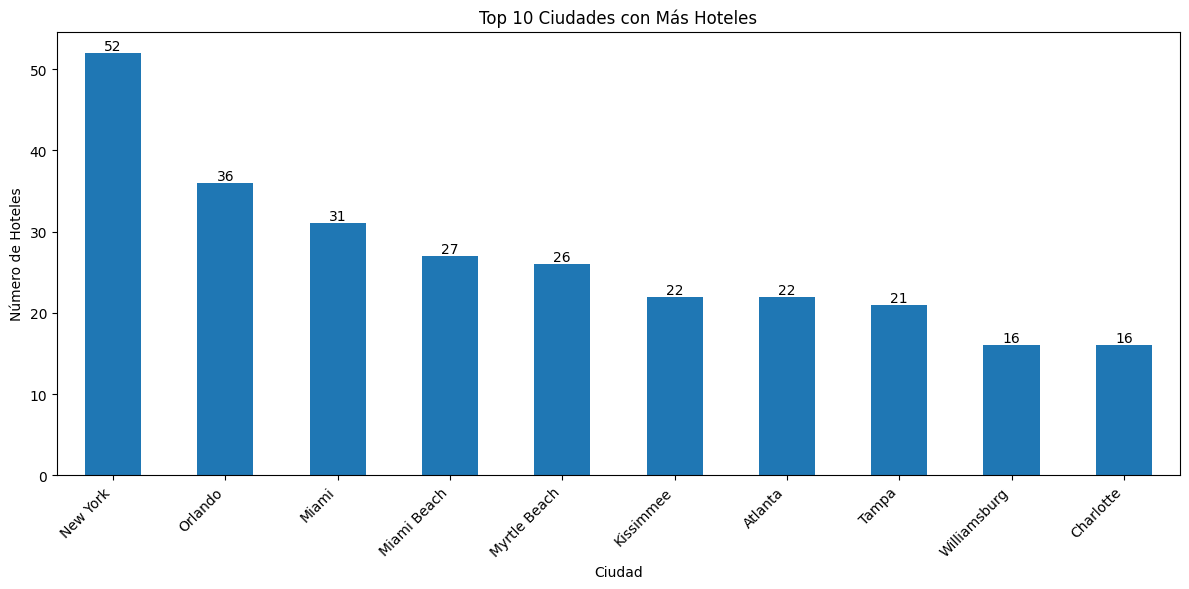


Top 10 Ciudades con Más Hoteles:
city
New York        52
Orlando         36
Miami           31
Miami Beach     27
Myrtle Beach    26
Kissimmee       22
Atlanta         22
Tampa           21
Williamsburg    16
Charlotte       16

Estadísticas Generales:
Total de hoteles: 1840
Número de ciudades con al menos un hotel: 841


In [19]:
# Agrupar por ciudad y contar
city_hotel_count = hotels_df.groupby('city').size().sort_values(ascending=False)

# Tomar las top 10 ciudades
top_10_cities = city_hotel_count.head(10)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
top_10_cities.plot(kind='bar', ax=ax)
ax.set_title('Top 10 Ciudades con Más Hoteles')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Número de Hoteles')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas de valor encima de cada barra
for i, v in enumerate(top_10_cities):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Mostrar el gráfico (esto puede no funcionar en todos los entornos)
plt.show()

# Imprimir los datos numéricos
print("\nTop 10 Ciudades con Más Hoteles:")
print(top_10_cities.to_string())

# Estadísticas adicionales
total_hotels = hotels_df.shape[0]
total_cities = city_hotel_count.shape[0]

print(f"\nEstadísticas Generales:")
print(f"Total de hoteles: {total_hotels}")
print(f"Número de ciudades con al menos un hotel: {total_cities}")

### **Comparacion del mercado de comida china, restaurantes con mayor cantidad de locales**

C:\Users\54370\AppData\Local\Temp\ipykernel_29600\3170635617.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_restaurants.values, y=top_10_restaurants.index, palette='coolwarm')


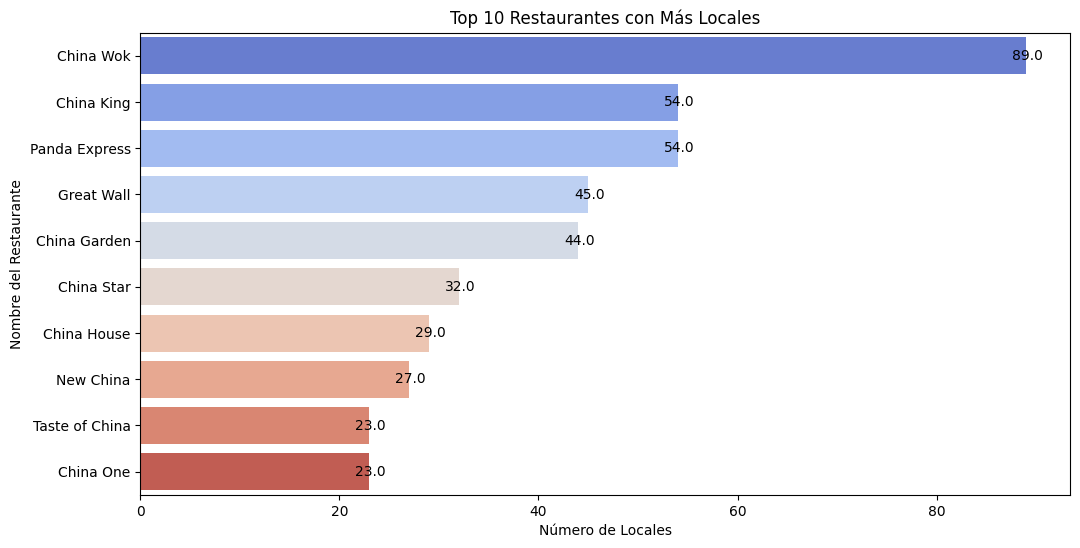

In [20]:

# Contar la cantidad de locales de cada restaurante según el nombre
restaurant_counts = df_cr['name'].value_counts()

# Obtener el top 10 de restaurantes con más locales
top_10_restaurants = restaurant_counts.head(10)

# Visualizar los resultados
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras con Seaborn
ax = sns.barplot(x=top_10_restaurants.values, y=top_10_restaurants.index, palette='coolwarm')

# Añadir etiquetas y título
plt.title('Top 10 Restaurantes con Más Locales')
plt.xlabel('Número de Locales')
plt.ylabel('Nombre del Restaurante')

# Añadir anotaciones de las cantidades en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='black')
 
# Mostrar el gráfico
plt.show()

### **Top 20 de los restaurantes con más locales de comida China con mejor calificación promedio**

C:\Users\54370\AppData\Local\Temp\ipykernel_29600\2910930624.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_avg_ratings.values, y=top_10_avg_ratings.index, palette='coolwarm')


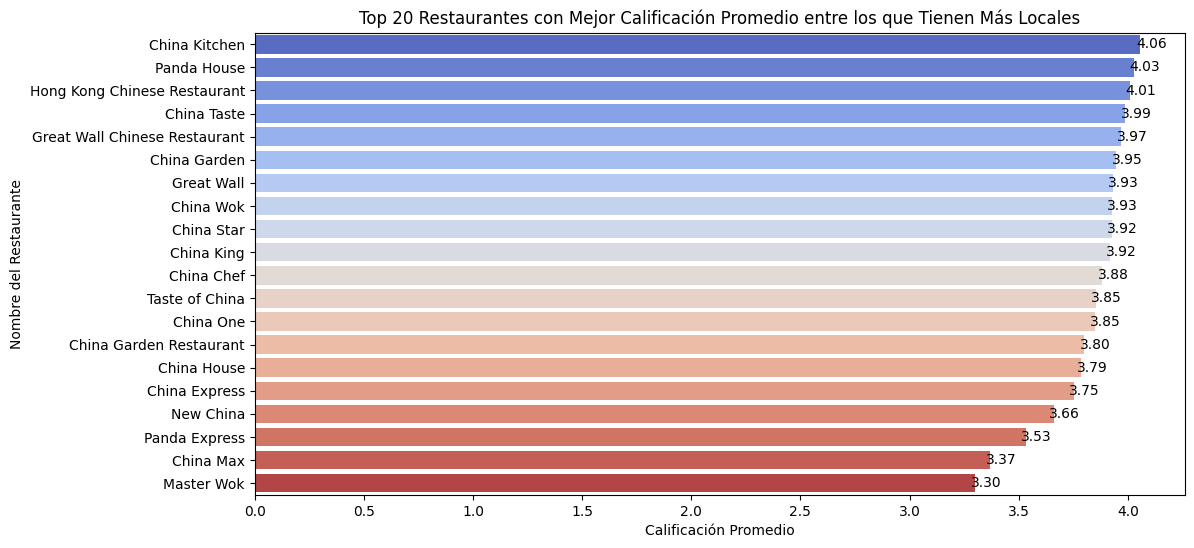

In [21]:

# Contar la cantidad de locales de cada restaurante según el nombre
restaurant_counts = df_cr['name'].value_counts()

# Obtener el top 10 de restaurantes con más locales
top_10_restaurants = restaurant_counts.head(20).index

# Filtrar el DataFrame original para incluir solo estos restaurantes
filtered_df = df_cr[df_cr['name'].isin(top_10_restaurants)]

# Calcular la calificación promedio para cada restaurante en el top 10
avg_ratings = filtered_df.groupby('name')['avg_rating'].mean()

# Ordenar los restaurantes por calificación promedio y seleccionar el top 10
top_10_avg_ratings = avg_ratings.sort_values(ascending=False).head(20)

# Visualizar los resultados
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras con Seaborn
ax = sns.barplot(x=top_10_avg_ratings.values, y=top_10_avg_ratings.index, palette='coolwarm')

# Añadir etiquetas y título
plt.title('Top 20 Restaurantes con Mejor Calificación Promedio entre los que Tienen Más Locales')
plt.xlabel('Calificación Promedio')
plt.ylabel('Nombre del Restaurante')

# Añadir anotaciones de las calificaciones en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2), 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='black')

# Mostrar el gráfico
plt.show()

### **Top 10 Restaurantes con Más Reseñas entre los que Tienen Más Locales**

C:\Users\54370\AppData\Local\Temp\ipykernel_29600\780546288.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_reviews.values, y=top_10_reviews.index, palette='coolwarm')


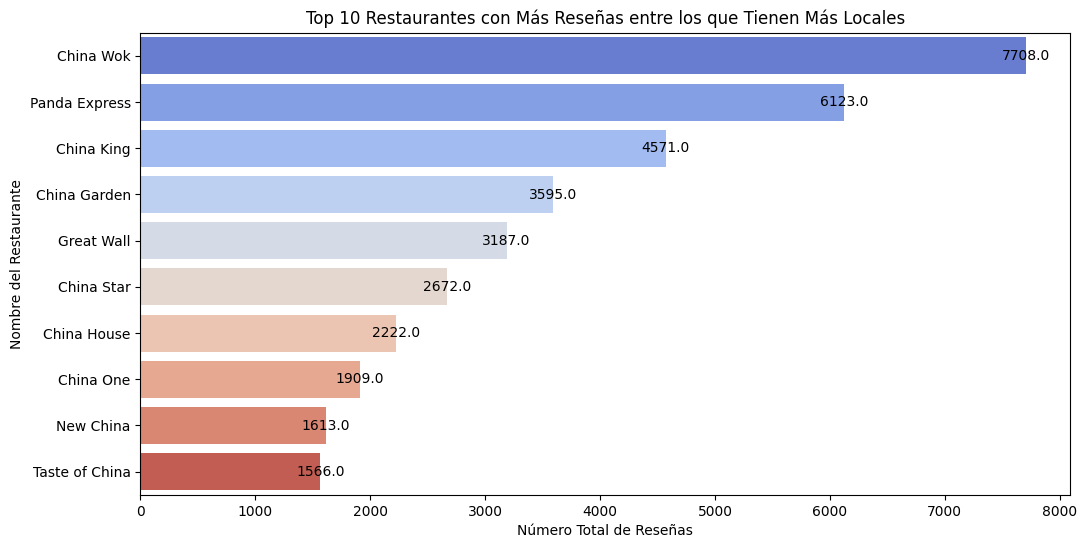

In [22]:
# Contar la cantidad de locales de cada restaurante según el nombre
restaurant_counts = df_cr['name'].value_counts()

# Obtener el top 10 de restaurantes con más locales
top_10_restaurants = restaurant_counts.head(10).index

# Filtrar el DataFrame original para incluir solo estos restaurantes
filtered_df = df_cr[df_cr['name'].isin(top_10_restaurants)]

# Contar el número total de reseñas para cada restaurante en el top 10
total_reviews = filtered_df.groupby('name')['num_of_reviews'].sum()

# Ordenar los restaurantes por número total de reseñas y seleccionar el top 10
top_10_reviews = total_reviews.sort_values(ascending=False).head(10)

# Visualizar los resultados
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras con Seaborn
ax = sns.barplot(x=top_10_reviews.values, y=top_10_reviews.index, palette='coolwarm')

# Añadir etiquetas y título
plt.title('Top 10 Restaurantes con Más Reseñas entre los que Tienen Más Locales')
plt.xlabel('Número Total de Reseñas')
plt.ylabel('Nombre del Restaurante')

# Añadir anotaciones de las reseñas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2), 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='black')

# Mostrar el gráfico
plt.show()

# **Análisis específico de la cadena China Garden**

In [23]:
df_metadata_google = pd.read_parquet('Datasets\Google\metadata-sitios\metadata-limpio.parquet')
df_metadata_google.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,[Pharmacy],4.9,16,GA,Georgia,Cochran
14,NTK OUTDOOR,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",0x88d9beb4fe0532c1:0xef0555c169299d6,25.795204,-80.366038,[Corporate office],5.0,35,FL,Florida,Miami
45,Cruises Inc. - Connie Stewart,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",0x88c2e49b79f06c31:0x4ed8c8ce27e926e0,27.832187,-82.704805,[Cruise agency],5.0,2,FL,Florida,Pinellas Park


In [24]:
# Filtrar los restaurantes 'China Garden'
china_garden_df = df_metadata_google[df_metadata_google['name'] == 'China Garden']

# Contar el número de locales
num_locales = len(china_garden_df)

# Calcular el promedio de 'avg_rating'
avg_rating_total = china_garden_df['avg_rating'].mean()

print(f"Número de locales de China Garden: {num_locales}")
print(f"Puntuación promedio (avg_rating) de China Garden: {avg_rating_total:.2f}")

# Mostrar los primeros registros para verificación
print("\nPrimeros registros de China Garden:")
print(china_garden_df[['name', 'address', 'avg_rating', 'estado']].head())

Número de locales de China Garden: 46
Puntuación promedio (avg_rating) de China Garden: 3.96

Primeros registros de China Garden:
                name                                            address  \
121158  China Garden    China Garden, 1123 Spring Ln, Sanford, NC 27330   
172181  China Garden    China Garden, 209 North Ave, Dunellen, NJ 08812   
276732  China Garden  China Garden, 108 W Main St STE D, Jamestown, ...   
277973  China Garden  China Garden, 3300 N Roosevelt Blvd 5618 296, ...   
321981  China Garden  China Garden, 111 W Church St, Troutman, NC 28166   

        avg_rating estado  
121158         4.5     NC  
172181         3.7     NJ  
276732         4.2     NC  
277973         3.9     FL  
321981         4.2     NC  


In [25]:
china_garden_df[['name', 'avg_rating', 'city', 'nombre_estado', 'num_of_reviews']].sort_values(by='num_of_reviews', ascending=False)


,name,avg_rating,city,nombre_estado,num_of_reviews
277973,China Garden,3.9,Key West,Florida,254
2471858,China Garden,4.1,Milledgeville,Georgia,208
590192,China Garden,3.6,Cameron,North Carolina,195
2118991,China Garden,3.7,Jefferson,Georgia,177
2540701,China Garden,4.1,Lakeland,Florida,146
666593,China Garden,4.0,Central Islip,New York,138
2494470,China Garden,4.3,Emporia,Virginia,128
813407,China Garden,3.8,Big Pine Key,Florida,127
731312,China Garden,4.4,Spring Hill,Florida,118
2875688,China Garden,4.4,Braselton,Georgia,116


In [26]:
# Filtrar los restaurantes 'China Garden'
china_garden_df = df_metadata_google[df_metadata_google['name'] == 'China Garden']

# Agrupar por ciudad y contar el número de restaurantes
city_distribution = china_garden_df.groupby('city').size().sort_values(ascending=False).reset_index(name='count')

# Calcular el rating promedio por ciudad
city_avg_rating = china_garden_df.groupby('city')['avg_rating'].mean().round(2)

# Combinar el conteo y el rating promedio
city_analysis = city_distribution.merge(city_avg_rating, on='city', how='left')

# Renombrar las columnas para mayor claridad
city_analysis.columns = ['Ciudad', 'Número de Restaurantes', 'Rating Promedio']

# Mostrar los resultados
print("Distribución de restaurantes China Garden por ciudad:")
print(city_analysis.to_string(index=False))

# Calcular y mostrar estadísticas generales
total_restaurants = city_analysis['Número de Restaurantes'].sum()
total_cities = len(city_analysis)
overall_avg_rating = china_garden_df['avg_rating'].mean()

print(f"\nEstadísticas Generales:")
print(f"Total de restaurantes China Garden: {total_restaurants}")
print(f"Número de ciudades con presencia: {total_cities}")
print(f"Rating promedio general: {overall_avg_rating:.2f}")

Distribución de restaurantes China Garden por ciudad:
           Ciudad  Número de Restaurantes  Rating Promedio
         Brooklyn                       3             3.63
       Alexandria                       1             3.80
        Baltimore                       1             3.70
          Ansonia                       1             3.60
     Big Pine Key                       1             3.80
        Braselton                       1             4.40
       Burlington                       1             4.40
           Camden                       1             3.30
          Cameron                       1             3.60
        Canastota                       1             4.30
    Central Islip                       1             4.00
   City of Orange                       1             4.10
        Cleveland                       1             3.20
         Dayville                       1             4.20
       Dolgeville                       1             4.40
  

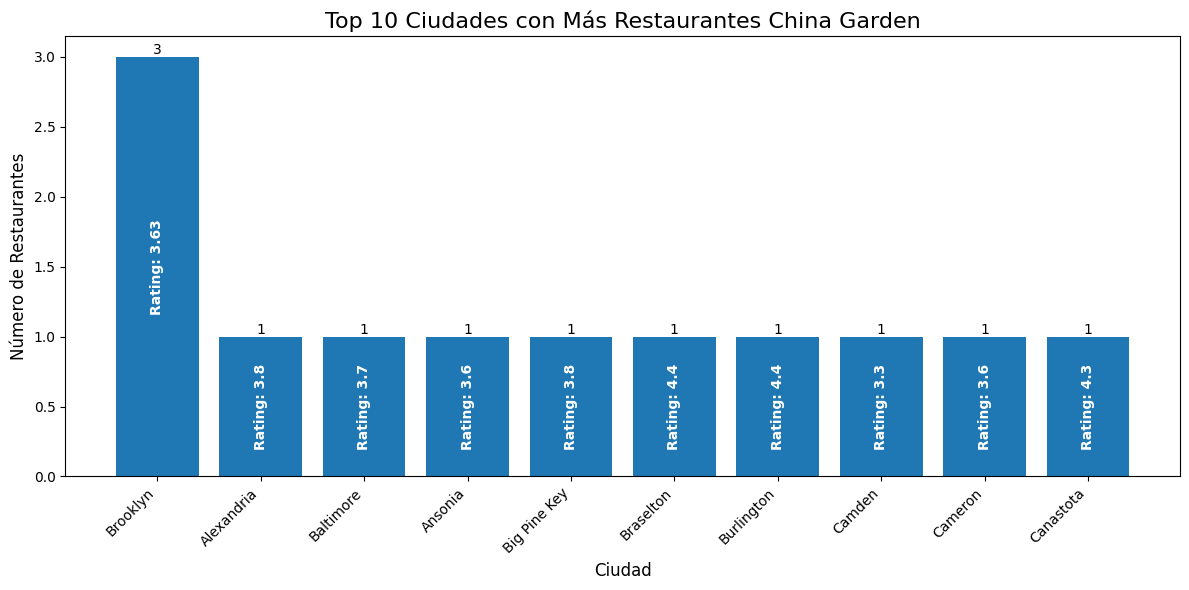

In [27]:
import matplotlib.pyplot as plt

# Ordenar los datos por número de restaurantes y tomar las top 10 ciudades
top_10_cities = city_analysis.sort_values('Número de Restaurantes', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_cities['Ciudad'], top_10_cities['Número de Restaurantes'])

# Personalizar el gráfico
plt.title('Top 10 Ciudades con Más Restaurantes China Garden', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Número de Restaurantes', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Añadir el rating promedio como texto en cada barra
for i, bar in enumerate(bars):
    rating = top_10_cities.iloc[i]['Rating Promedio']
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
             f'Rating: {rating}',
             ha='center', va='center', rotation=90, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [28]:
china_garden_df['nombre_estado'].value_counts()

nombre_estado
New York          10
New Jersey         9
Florida            7
North Carolina     6
Connecticut        4
Georgia            4
Virginia           3
Maryland           2
Rhode Island       1
Name: count, dtype: int64

### **Ubicación de los locales de China Garden**

In [47]:
%pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 1.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 3.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
import folium

# Crear un mapa centrado en el punto promedio de todas las ubicaciones
map_center = [china_garden_df['latitude'].mean(), china_garden_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=14)

# Añadir marcadores para cada local
for _, row in china_garden_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('china_garden_map.html')

# Para visualizar en Jupyter Notebook, descomentar la siguiente línea
m

In [30]:
china_garden_df.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
121158,China Garden,"China Garden, 1123 Spring Ln, Sanford, NC 27330",0x89aca89dadfa8ed9:0xf8464b9a9871c040,35.486454,-79.201769,[Restaurant],4.5,6,NC,North Carolina,Sanford
172181,China Garden,"China Garden, 209 North Ave, Dunellen, NJ 08812",0x89c3b9050ecda13d:0xe7d0cc1f0b785345,40.592636,-74.461681,"[Chinese restaurant, Asian restaurant, Deliver...",3.7,34,NJ,New Jersey,Dunellen
276732,China Garden,"China Garden, 108 W Main St STE D, Jamestown, ...",0x88530fea3a837eef:0xb20c7dce9609954c,35.994114,-79.936839,[Chinese restaurant],4.2,28,NC,North Carolina,Jamestown


In [31]:
df_review_estados.head(3)

,user_id,name,time,rating,text,gmap_id
0,1.140765e+20,Jeff Mccomish,1612059976820,5,Great friendly independent packie,0x89e64b04d274c9d9:0x84d833dcc10ae21d
1,1.015203e+20,Outlaw PiRu,1544752859553,5,Great Atmosphere and Great Service. Fantastic ...,0x89e64b04d274c9d9:0x84d833dcc10ae21d
2,1.118002e+20,Hector Acevedo,1564367962353,5,Nice neighborhood store with great sandwiches ...,0x89e64b04d274c9d9:0x84d833dcc10ae21d


### Unir dataframes china garden con review-estados

In [33]:
df_unido = pd.merge(china_garden_df, df_review_estados, on='gmap_id', how='inner')  # inner, left, right, outer

print(df_unido)

            name_x                                            address  \
0     China Garden    China Garden, 209 North Ave, Dunellen, NJ 08812   
1     China Garden    China Garden, 209 North Ave, Dunellen, NJ 08812   
2     China Garden    China Garden, 209 North Ave, Dunellen, NJ 08812   
3     China Garden    China Garden, 209 North Ave, Dunellen, NJ 08812   
4     China Garden    China Garden, 209 North Ave, Dunellen, NJ 08812   
...            ...                                                ...   
1673  China Garden  China Garden, 8653 Belair Rd, Baltimore, MD 21236   
1674  China Garden  China Garden, 8653 Belair Rd, Baltimore, MD 21236   
1675  China Garden  China Garden, 8653 Belair Rd, Baltimore, MD 21236   
1676  China Garden  China Garden, 8653 Belair Rd, Baltimore, MD 21236   
1677  China Garden  China Garden, 8653 Belair Rd, Baltimore, MD 21236   

                                    gmap_id   latitude  longitude  \
0     0x89c3b9050ecda13d:0xe7d0cc1f0b785345  40.592636

In [34]:
df_unido.head(3)

,name_x,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city,user_id,name_y,time,rating,text
0,China Garden,"China Garden, 209 North Ave, Dunellen, NJ 08812",0x89c3b9050ecda13d:0xe7d0cc1f0b785345,40.592636,-74.461681,"[Chinese restaurant, Asian restaurant, Deliver...",3.7,34,NJ,New Jersey,Dunellen,1.125038e+20,John Campbell,1544466023862,4,Good food good prices
1,China Garden,"China Garden, 209 North Ave, Dunellen, NJ 08812",0x89c3b9050ecda13d:0xe7d0cc1f0b785345,40.592636,-74.461681,"[Chinese restaurant, Asian restaurant, Deliver...",3.7,34,NJ,New Jersey,Dunellen,1.076216e+20,Cheryl Kimble,1483899014865,5,The food is good and they are quick to prepare.
2,China Garden,"China Garden, 209 North Ave, Dunellen, NJ 08812",0x89c3b9050ecda13d:0xe7d0cc1f0b785345,40.592636,-74.461681,"[Chinese restaurant, Asian restaurant, Deliver...",3.7,34,NJ,New Jersey,Dunellen,1.142247e+20,Spencer Duncan,1468894704924,4,bizarre place but the food was pretty good act...


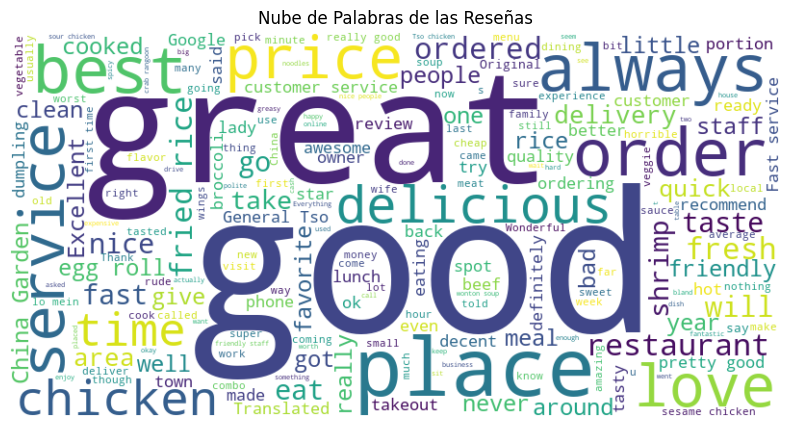

In [36]:
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Creamos la lista de palabras a excluir
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "None", "Chinese", "food"])

# Convertimos todos los valores en la columna 'text' a cadenas de texto
# y los unimos en una sola cadena
text = " ".join(str(text) for text in df_unido['text'] if str(text) != 'None')

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(text)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de las Reseñas')
plt.show()

### **Nube de palabras del total de Restaurantes chinos**

In [37]:
df_cr.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
2880,China House Chinese & American Food,"China House Chinese & American Food, 827 Broad...",0x89c6c8e87f60800d:0xbacca2e5a90bdfcb,39.935655,-75.119530,Chinese restaurant,5.0,4,NJ,New Jersey,Camden
8172,WUJI,"WUJI, 68 E Putnam Ave, Greenwich, CT 06830",0x89c29846a70925f3:0xd15fd18f2efe0a63,41.032745,-73.624310,Chinese restaurant,3.8,18,CT,Connecticut,Greenwich
8820,Panda Express,"Panda Express, 13059 Lee Jackson Memorial Hwy,...",0x89b645175b2f5bf1:0x4000b96ee41f94d9,38.880261,-77.398403,Chinese restaurant,3.8,48,VA,Virginia,Fairfax


In [38]:
df_unido_cr = pd.merge(df_cr, df_review_estados, on='gmap_id', how='inner')  # inner, left, right, outer


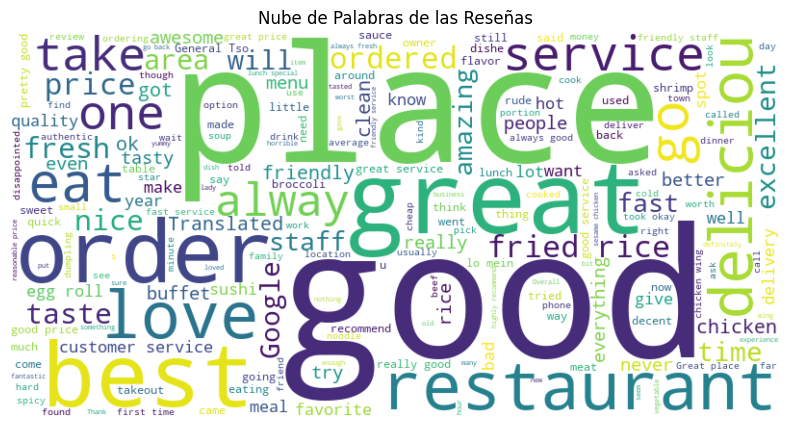

In [39]:
# Creamos la lista de palabras a excluir
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "None", "Chinese", "food"])

# Convertimos todos los valores en la columna 'text' a cadenas de texto
# y los unimos en una sola cadena
text = " ".join(str(text) for text in df_unido_cr['text'] if str(text) != 'None')

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(text)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de las Reseñas')
plt.show()

### **TOP 20 palabras más usadas China Garden**

In [50]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Descargar stopwords en inglés (ya que los comentarios parecen estar en inglés)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Agregar palabras adicionales a excluir
stop_words.update(["br", "href", "none", "chinese", "food", "restaurant"])

# Asumimos que 'df_unido' es tu DataFrame. Si no es así, cárgalo aquí:
# df_unido = pd.read_csv('tu_archivo.csv')

# Función para limpiar y tokenizar el texto
def clean_and_tokenize(text):
    # Convertir a minúsculas y eliminar caracteres no alfanuméricos
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    # Tokenizar (dividir en palabras individuales)
    tokens = text.split()
    # Eliminar stopwords y palabras cortas (menos de 3 caracteres)
    return [word for word in tokens if word not in stop_words and len(word) > 2]

# Aplicar la función a la columna 'text' y aplanar la lista
all_words = [word for sublist in df_unido['text'].apply(clean_and_tokenize) for word in sublist]

# Contar las palabras
word_counts = Counter(all_words)

# Obtener las 20 palabras más frecuentes
top_20_words = word_counts.most_common(20)

# Imprimir los resultados
print("Las 20 palabras más usadas:")
for word, count in top_20_words:
    print(f"{word}: {count}")

# Opcional: crear un DataFrame con los resultados
top_20_df_cg = pd.DataFrame(top_20_words, columns=['Palabra', 'Frecuencia'])
print(top_20_df_cg)

Las 20 palabras más usadas:
good: 426
great: 227
place: 169
service: 155
chicken: 126
always: 118
best: 112
order: 104
rice: 104
love: 86
time: 79
delicious: 72
fried: 72
fast: 71
ordered: 66
prices: 63
like: 62
nice: 60
friendly: 60
fresh: 58
      Palabra  Frecuencia
0        good         426
1       great         227
2       place         169
3     service         155
4     chicken         126
5      always         118
6        best         112
7       order         104
8        rice         104
9        love          86
10       time          79
11  delicious          72
12      fried          72
13       fast          71
14    ordered          66
15     prices          63
16       like          62
17       nice          60
18   friendly          60
19      fresh          58


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\54370\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **TOP 20 palabras más usadas Restaurantes Chinos**

In [51]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Descargar stopwords en inglés (ya que los comentarios parecen estar en inglés)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Agregar palabras adicionales a excluir
stop_words.update(["br", "href", "none", "chinese", "food", "restaurant"])

# Asumimos que 'df_unido' es tu DataFrame. Si no es así, cárgalo aquí:
# df_unido = pd.read_csv('tu_archivo.csv')

# Función para limpiar y tokenizar el texto
def clean_and_tokenize(text):
    # Convertir a minúsculas y eliminar caracteres no alfanuméricos
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    # Tokenizar (dividir en palabras individuales)
    tokens = text.split()
    # Eliminar stopwords y palabras cortas (menos de 3 caracteres)
    return [word for word in tokens if word not in stop_words and len(word) > 2]

# Aplicar la función a la columna 'text' y aplanar la lista
all_words = [word for sublist in df_unido_cr['text'].apply(clean_and_tokenize) for word in sublist]

# Contar las palabras
word_counts = Counter(all_words)

# Obtener las 20 palabras más frecuentes
top_20_words = word_counts.most_common(20)

# Imprimir los resultados
print("Las 20 palabras más usadas:")
for word, count in top_20_words:
    print(f"{word}: {count}")

# Opcional: crear un DataFrame con los resultados
top_20_df_cr = pd.DataFrame(top_20_words, columns=['Palabra', 'Frecuencia'])
print(top_20_df_cr)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\54370\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Las 20 palabras más usadas:
good: 50234
great: 32508
place: 24352
service: 21376
best: 15958
chicken: 14970
always: 14196
order: 12012
love: 10647
like: 10374
rice: 10089
time: 9877
delicious: 9333
friendly: 9148
nice: 9053
fresh: 8090
get: 8052
fried: 7672
staff: 7503
fast: 7203
      Palabra  Frecuencia
0        good       50234
1       great       32508
2       place       24352
3     service       21376
4        best       15958
5     chicken       14970
6      always       14196
7       order       12012
8        love       10647
9        like       10374
10       rice       10089
11       time        9877
12  delicious        9333
13   friendly        9148
14       nice        9053
15      fresh        8090
16        get        8052
17      fried        7672
18      staff        7503
19       fast        7203


In [47]:
top_20_df_cr

,Palabra,Frecuencia
0,good,50234
1,great,32508
2,place,24352
3,service,21376
4,best,15958
5,chicken,14970
6,always,14196
7,order,12012
8,love,10647
9,like,10374


      Palabra  Frecuencia_CR  Frecuencia_CG
0        good        50234.0          426.0
1       great        32508.0          227.0
2       place        24352.0          169.0
3     service        21376.0          155.0
4        best        15958.0          112.0
5     chicken        14970.0          126.0
6      always        14196.0          118.0
7       order        12012.0          104.0
8        love        10647.0           86.0
9        like        10374.0           62.0
10       rice        10089.0          104.0
11       time         9877.0           79.0
12  delicious         9333.0           72.0
13   friendly         9148.0           60.0
14       nice         9053.0           60.0
15      fresh         8090.0           58.0
16        get         8052.0            0.0
17      fried         7672.0           72.0
18      staff         7503.0            0.0
19       fast         7203.0           71.0
20    ordered            0.0           66.0
21     prices            0.0    

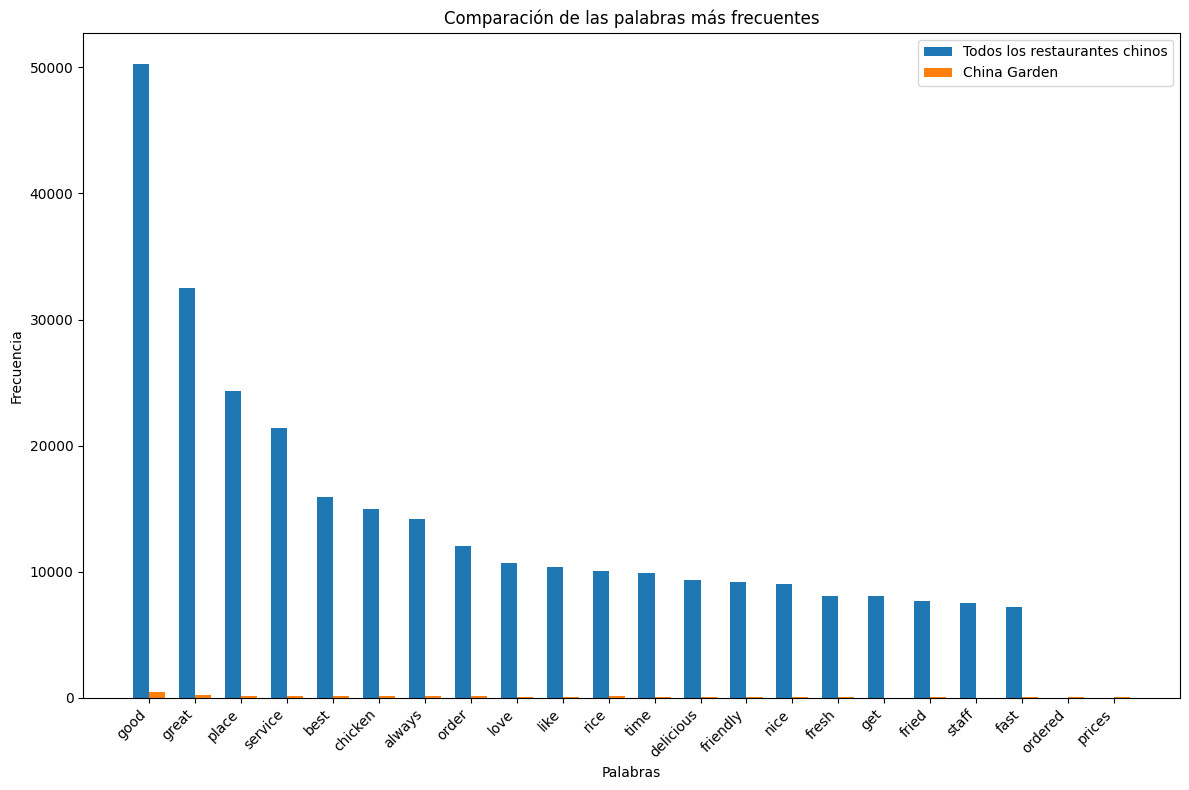

In [52]:
# Renombrar las columnas para distinguir entre los dos conjuntos de datos
top_20_df_cr = top_20_df_cr.rename(columns={'Frecuencia': 'Frecuencia_CR'})
top_20_df_cg = top_20_df_cg.rename(columns={'Frecuencia': 'Frecuencia_CG'})

# Combinar los DataFrames usando un outer join en la columna 'Palabra'
df_comparativo = pd.merge(top_20_df_cr, top_20_df_cg, on='Palabra', how='outer')

# Rellenar los valores NaN con 0
df_comparativo = df_comparativo.fillna(0)

# Ordenar el DataFrame por la suma de las frecuencias en orden descendente
df_comparativo['Total'] = df_comparativo['Frecuencia_CR'] + df_comparativo['Frecuencia_CG']
df_comparativo = df_comparativo.sort_values('Total', ascending=False)

# Eliminar la columna 'Total' si no la necesitas en el resultado final
df_comparativo = df_comparativo.drop('Total', axis=1)

# Resetear el índice
df_comparativo = df_comparativo.reset_index(drop=True)

# Mostrar el DataFrame comparativo
print(df_comparativo)

# Opcional: Guardar el DataFrame comparativo en un archivo CSV
# df_comparativo.to_csv('comparativo_palabras_frecuentes.csv', index=False)

# Opcional: Crear un gráfico de barras comparativo
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(df_comparativo))

plt.bar(index, df_comparativo['Frecuencia_CR'], bar_width, label='Todos los restaurantes chinos')
plt.bar([i + bar_width for i in index], df_comparativo['Frecuencia_CG'], bar_width, label='China Garden')

plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Comparación de las palabras más frecuentes')
plt.xticks([i + bar_width/2 for i in index], df_comparativo['Palabra'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()